## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 59ms	remaining: 58.9s
1:	learn: 0.9606716	total: 60ms	remaining: 30s
2:	learn: 0.9390920	total: 61.1ms	remaining: 20.3s
3:	learn: 0.9209237	total: 62.2ms	remaining: 15.5s
4:	learn: 0.9046978	total: 63.2ms	remaining: 12.6s
5:	learn: 0.8896854	total: 64.4ms	remaining: 10.7s
6:	learn: 0.8724151	total: 65.3ms	remaining: 9.27s
7:	learn: 0.8558633	total: 66.3ms	remaining: 8.22s
8:	learn: 0.8400199	total: 67.2ms	remaining: 7.4s
9:	learn: 0.8229065	total: 68.1ms	remaining: 6.75s
10:	learn: 0.8057776	total: 69ms	remaining: 6.21s
11:	learn: 0.7907426	total: 69.8ms	remaining: 5.75s
12:	learn: 0.7753485	total: 70.6ms	remaining: 5.36s
13:	learn: 0.7601130	total: 71.5ms	remaining: 5.04s
14:	learn: 0.7475256	total: 72.4ms	remaining: 4.75s
15:	learn: 0.7326054	total: 73.3ms	remaining: 4.51s
16:	learn: 0.7206853	total: 74.1ms	remaining: 4.29s
17:	learn: 0.7077303	total: 75ms	remaining: 4.09s
18:	learn: 0.6955287	total: 75.9ms	remaining: 3.92s
19:

107:	learn: 0.2965967	total: 150ms	remaining: 1.24s
108:	learn: 0.2951864	total: 151ms	remaining: 1.23s
109:	learn: 0.2942861	total: 151ms	remaining: 1.23s
110:	learn: 0.2932928	total: 152ms	remaining: 1.22s
111:	learn: 0.2916150	total: 153ms	remaining: 1.21s
112:	learn: 0.2903158	total: 154ms	remaining: 1.21s
113:	learn: 0.2893044	total: 155ms	remaining: 1.2s
114:	learn: 0.2880453	total: 155ms	remaining: 1.2s
115:	learn: 0.2868924	total: 156ms	remaining: 1.19s
116:	learn: 0.2854905	total: 157ms	remaining: 1.18s
117:	learn: 0.2838426	total: 158ms	remaining: 1.18s
118:	learn: 0.2827228	total: 159ms	remaining: 1.17s
119:	learn: 0.2820207	total: 159ms	remaining: 1.17s
120:	learn: 0.2807575	total: 160ms	remaining: 1.16s
121:	learn: 0.2800950	total: 161ms	remaining: 1.16s
122:	learn: 0.2793606	total: 162ms	remaining: 1.16s
123:	learn: 0.2786503	total: 163ms	remaining: 1.15s
124:	learn: 0.2775226	total: 164ms	remaining: 1.15s
125:	learn: 0.2762040	total: 165ms	remaining: 1.14s
126:	learn: 0.

156:	learn: 0.2484356	total: 191ms	remaining: 1.03s
157:	learn: 0.2475208	total: 192ms	remaining: 1.02s
158:	learn: 0.2467460	total: 193ms	remaining: 1.02s
159:	learn: 0.2461317	total: 194ms	remaining: 1.02s
160:	learn: 0.2456028	total: 195ms	remaining: 1.01s
161:	learn: 0.2449256	total: 196ms	remaining: 1.01s
162:	learn: 0.2444113	total: 197ms	remaining: 1.01s
163:	learn: 0.2438126	total: 197ms	remaining: 1.01s
164:	learn: 0.2432080	total: 198ms	remaining: 1s
165:	learn: 0.2425986	total: 199ms	remaining: 1000ms
166:	learn: 0.2421108	total: 200ms	remaining: 996ms
167:	learn: 0.2413956	total: 201ms	remaining: 993ms
168:	learn: 0.2407630	total: 201ms	remaining: 990ms
169:	learn: 0.2401529	total: 202ms	remaining: 987ms
170:	learn: 0.2391465	total: 203ms	remaining: 984ms
171:	learn: 0.2383087	total: 204ms	remaining: 981ms
172:	learn: 0.2377594	total: 205ms	remaining: 978ms
173:	learn: 0.2373192	total: 205ms	remaining: 975ms
174:	learn: 0.2367045	total: 206ms	remaining: 972ms
175:	learn: 0.

331:	learn: 0.1669891	total: 340ms	remaining: 683ms
332:	learn: 0.1666284	total: 341ms	remaining: 682ms
333:	learn: 0.1664670	total: 341ms	remaining: 681ms
334:	learn: 0.1660441	total: 342ms	remaining: 679ms
335:	learn: 0.1657088	total: 343ms	remaining: 678ms
336:	learn: 0.1653987	total: 344ms	remaining: 677ms
337:	learn: 0.1652355	total: 345ms	remaining: 676ms
338:	learn: 0.1648615	total: 346ms	remaining: 674ms
339:	learn: 0.1646361	total: 347ms	remaining: 673ms
340:	learn: 0.1643424	total: 347ms	remaining: 671ms
341:	learn: 0.1641025	total: 348ms	remaining: 670ms
342:	learn: 0.1637969	total: 349ms	remaining: 669ms
343:	learn: 0.1634989	total: 350ms	remaining: 667ms
344:	learn: 0.1631288	total: 351ms	remaining: 666ms
345:	learn: 0.1630031	total: 352ms	remaining: 665ms
346:	learn: 0.1625470	total: 352ms	remaining: 663ms
347:	learn: 0.1622545	total: 353ms	remaining: 662ms
348:	learn: 0.1619905	total: 354ms	remaining: 660ms
349:	learn: 0.1619095	total: 355ms	remaining: 659ms
350:	learn: 

381:	learn: 0.1530299	total: 382ms	remaining: 618ms
382:	learn: 0.1528336	total: 383ms	remaining: 617ms
383:	learn: 0.1526162	total: 384ms	remaining: 616ms
384:	learn: 0.1523426	total: 385ms	remaining: 615ms
385:	learn: 0.1521042	total: 386ms	remaining: 613ms
386:	learn: 0.1518990	total: 387ms	remaining: 612ms
387:	learn: 0.1516118	total: 387ms	remaining: 611ms
388:	learn: 0.1513630	total: 388ms	remaining: 610ms
389:	learn: 0.1511214	total: 389ms	remaining: 609ms
390:	learn: 0.1508794	total: 390ms	remaining: 607ms
391:	learn: 0.1505564	total: 391ms	remaining: 606ms
392:	learn: 0.1502135	total: 392ms	remaining: 605ms
393:	learn: 0.1500112	total: 392ms	remaining: 604ms
394:	learn: 0.1496611	total: 393ms	remaining: 602ms
395:	learn: 0.1494434	total: 394ms	remaining: 601ms
396:	learn: 0.1493585	total: 395ms	remaining: 600ms
397:	learn: 0.1491921	total: 396ms	remaining: 599ms
398:	learn: 0.1491377	total: 396ms	remaining: 597ms
399:	learn: 0.1490262	total: 397ms	remaining: 596ms
400:	learn: 

555:	learn: 0.1187021	total: 531ms	remaining: 424ms
556:	learn: 0.1185118	total: 532ms	remaining: 423ms
557:	learn: 0.1183468	total: 533ms	remaining: 422ms
558:	learn: 0.1181768	total: 534ms	remaining: 421ms
559:	learn: 0.1179853	total: 534ms	remaining: 420ms
560:	learn: 0.1177859	total: 535ms	remaining: 419ms
561:	learn: 0.1175936	total: 536ms	remaining: 418ms
562:	learn: 0.1174509	total: 537ms	remaining: 417ms
563:	learn: 0.1172948	total: 537ms	remaining: 416ms
564:	learn: 0.1171456	total: 538ms	remaining: 414ms
565:	learn: 0.1170940	total: 539ms	remaining: 413ms
566:	learn: 0.1169048	total: 540ms	remaining: 412ms
567:	learn: 0.1167425	total: 541ms	remaining: 411ms
568:	learn: 0.1166102	total: 542ms	remaining: 410ms
569:	learn: 0.1164306	total: 542ms	remaining: 409ms
570:	learn: 0.1162908	total: 543ms	remaining: 408ms
571:	learn: 0.1161027	total: 544ms	remaining: 407ms
572:	learn: 0.1159918	total: 545ms	remaining: 406ms
573:	learn: 0.1157478	total: 546ms	remaining: 405ms
574:	learn: 

608:	learn: 0.1099385	total: 573ms	remaining: 368ms
609:	learn: 0.1098121	total: 574ms	remaining: 367ms
610:	learn: 0.1095752	total: 575ms	remaining: 366ms
611:	learn: 0.1093711	total: 576ms	remaining: 365ms
612:	learn: 0.1092450	total: 576ms	remaining: 364ms
613:	learn: 0.1091083	total: 577ms	remaining: 363ms
614:	learn: 0.1089889	total: 578ms	remaining: 362ms
615:	learn: 0.1087121	total: 579ms	remaining: 361ms
616:	learn: 0.1085368	total: 580ms	remaining: 360ms
617:	learn: 0.1083683	total: 580ms	remaining: 359ms
618:	learn: 0.1082199	total: 581ms	remaining: 358ms
619:	learn: 0.1080364	total: 582ms	remaining: 357ms
620:	learn: 0.1079670	total: 583ms	remaining: 356ms
621:	learn: 0.1078282	total: 583ms	remaining: 355ms
622:	learn: 0.1076194	total: 584ms	remaining: 353ms
623:	learn: 0.1075090	total: 585ms	remaining: 352ms
624:	learn: 0.1072767	total: 586ms	remaining: 351ms
625:	learn: 0.1070961	total: 586ms	remaining: 350ms
626:	learn: 0.1069382	total: 587ms	remaining: 349ms
627:	learn: 

784:	learn: 0.0872790	total: 719ms	remaining: 197ms
785:	learn: 0.0871866	total: 720ms	remaining: 196ms
786:	learn: 0.0870605	total: 721ms	remaining: 195ms
787:	learn: 0.0869480	total: 722ms	remaining: 194ms
788:	learn: 0.0868796	total: 723ms	remaining: 193ms
789:	learn: 0.0867424	total: 724ms	remaining: 192ms
790:	learn: 0.0866955	total: 725ms	remaining: 191ms
791:	learn: 0.0865584	total: 725ms	remaining: 191ms
792:	learn: 0.0864905	total: 726ms	remaining: 190ms
793:	learn: 0.0863819	total: 727ms	remaining: 189ms
794:	learn: 0.0863573	total: 728ms	remaining: 188ms
795:	learn: 0.0862351	total: 729ms	remaining: 187ms
796:	learn: 0.0861251	total: 730ms	remaining: 186ms
797:	learn: 0.0860579	total: 731ms	remaining: 185ms
798:	learn: 0.0860072	total: 732ms	remaining: 184ms
799:	learn: 0.0859006	total: 733ms	remaining: 183ms
800:	learn: 0.0858199	total: 734ms	remaining: 182ms
801:	learn: 0.0856808	total: 735ms	remaining: 181ms
802:	learn: 0.0855259	total: 736ms	remaining: 181ms
803:	learn: 

829:	learn: 0.0827970	total: 760ms	remaining: 156ms
830:	learn: 0.0826774	total: 761ms	remaining: 155ms
831:	learn: 0.0826484	total: 762ms	remaining: 154ms
832:	learn: 0.0825145	total: 763ms	remaining: 153ms
833:	learn: 0.0823617	total: 764ms	remaining: 152ms
834:	learn: 0.0822500	total: 765ms	remaining: 151ms
835:	learn: 0.0822379	total: 765ms	remaining: 150ms
836:	learn: 0.0821608	total: 766ms	remaining: 149ms
837:	learn: 0.0821032	total: 767ms	remaining: 148ms
838:	learn: 0.0820332	total: 768ms	remaining: 147ms
839:	learn: 0.0819998	total: 769ms	remaining: 146ms
840:	learn: 0.0819906	total: 769ms	remaining: 145ms
841:	learn: 0.0819694	total: 770ms	remaining: 145ms
842:	learn: 0.0818688	total: 771ms	remaining: 144ms
843:	learn: 0.0817766	total: 772ms	remaining: 143ms
844:	learn: 0.0817014	total: 773ms	remaining: 142ms
845:	learn: 0.0815843	total: 774ms	remaining: 141ms
846:	learn: 0.0815290	total: 775ms	remaining: 140ms
847:	learn: 0.0814185	total: 776ms	remaining: 139ms
848:	learn: 

999:	learn: 0.0687026	total: 908ms	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2954156134105475


#### Sanity Checks 

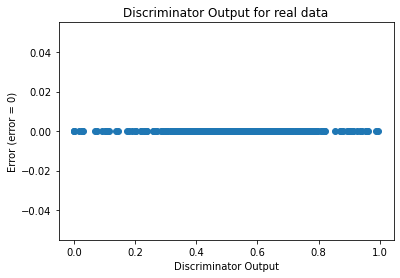

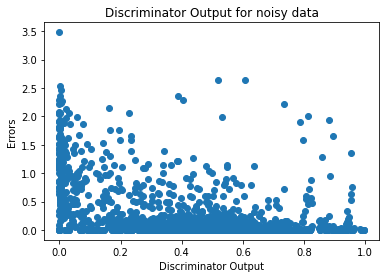

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 5000


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.2848534988550121


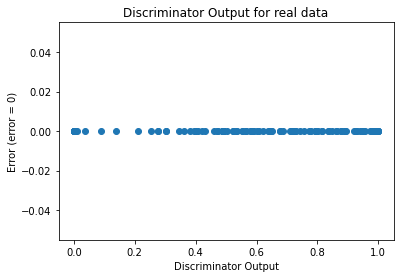

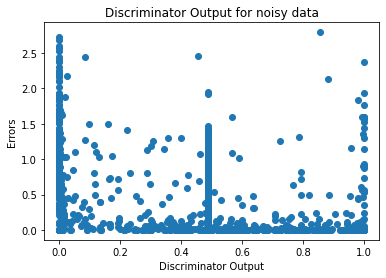

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22000875584453342


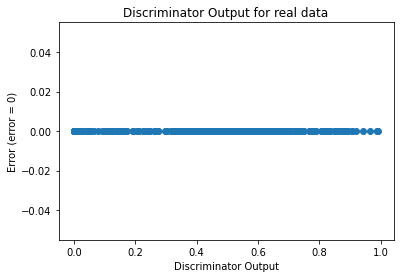

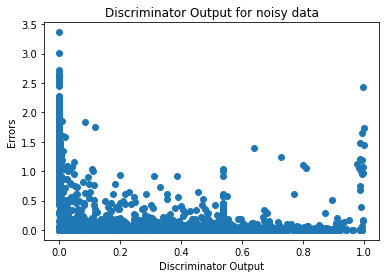

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7418]], requires_grad=True)
